In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import norm
import seaborn as sns
import random
from scipy import stats as st

#1

##a

In [ ]:

expon.cdf(7, scale=5)

np.float64(0.7534030360583935)

##b

In [ ]:

1-expon.cdf(4,scale=5)

np.float64(0.44932896411722156)

##c

In [ ]:

expon.cdf(6, scale=5)

np.float64(0.6988057880877978)

#2

##a

In [ ]:

1-poisson.cdf(12,13)

np.float64(0.5368952529003193)

##b

In [ ]:

poisson.cdf(0,1.3)

np.float64(0.27253179303401265)

#3

In [ ]:
samp100=st.binom.rvs(n=100, p=.25, size=100)
samp1000=st.binom.rvs(n=1000, p=.25, size=100)

##a

In [ ]:
samp100_mean=samp100.mean()

np.float64(26.04)

In [ ]:
samp100_std=samp100.std(ddof=1)

np.float64(4.348272616508163)

In [ ]:
samp1000_mean=samp1000.mean()

np.float64(249.72)

In [ ]:
samp1000_std=samp1000.std(ddof=1)

np.float64(13.85719373400755)

In [ ]:
print(f'Sample100 Mean:{samp100_mean},\nSample100 Std:{samp100_std} \nSample1000 Mean:{samp1000_mean} \nSample1000 Std:{samp1000_std}')

Sample100 Mean:26.04,
Sample100 Std:4.348272616508163 
Sample1000 Mean:249.72 
Sample1000 Std:13.85719373400755


##b

In [ ]:
true_mean100= .25*100
true_std100= np.sqrt(100*.25*.75)

true_mean1000=.25*1000
true_std1000=np.sqrt(1000*.25*.75)
print(f'True Mean100:{true_mean100} \nTrue Std100:{true_std100} \nTrue Mean 1000:{true_mean1000} \nTrue Std1000:{true_std1000}')

True Mean100:25.0 
True Std100:4.330127018922194 
True Mean 1000:250.0 
True Std1000:13.693063937629153


In [ ]:
mean_error100= (abs(samp100_mean-true_mean100))/true_mean100
std_error100= (abs(samp100_std-true_std100))/true_std100

mean_error1000= (abs(samp1000_mean-true_mean1000))/true_mean1000
std_error1000= (abs(samp1000_std-true_std1000))/true_std1000

In [ ]:
print(f'Mean Error100:{mean_error100} \nStd Error100:{std_error100} \nMean Error1000:{mean_error1000} \nStd Error1000:{std_error1000}')

Mean Error100:0.04159999999999996 
Std Error100:0.0041905462603464855 
Mean Error1000:0.0011200000000000045 
Std Error1000:0.011986345578023699


##c

In [ ]:
xbar=samp100_mean
s=samp100_std
lower_mean=xbar - (1.96*(s/np.sqrt(100)))
lower_mean

np.float64(25.1877385671644)

In [ ]:
upper_mean=xbar + (1.96*(s/np.sqrt(100)))
upper_mean

np.float64(26.8922614328356)

##d

In [ ]:
lower100=true_mean100 - 1.96*true_std100
upper100=true_mean100 + 1.96*true_std100
print(lower100, upper100)

16.5129510429125 33.487048957087495


##e

In [ ]:
samp100_arry=np.array(samp100)

In [ ]:
proportion100=np.sum((samp100_arry>=lower100) & (samp100_arry<=upper100))/100

In [ ]:
print(f'Proportion of samples within Samp100 that falls within the 95% CI from part d is {proportion100}')

Proportion of samples within Samp100 that falls within the 95% CI from part d is 0.95


In [ ]:
lower1000=true_mean1000 - 1.96*true_std1000
upper1000=true_mean1000 + 1.96*true_std1000
print(lower1000, upper1000)

223.16159468224686 276.83840531775314


In [ ]:
samp1000_arry=np.array(samp1000)
proportion1000=np.sum((samp1000_arry>=lower1000) & (samp100_arry<=upper1000))/100

In [ ]:
print(f'Proportion of samples within Samp1000 that falls within the 95% CI from part d is {proportion1000}')

Proportion of samples within Samp1000 that falls within the 95% CI from part d is 0.97


#4

In [ ]:
inv=500
sims=100
weeks=52
inv_end=[]
for i in range(sims):
  inventory=inv
  units=np.random.choice([40,50], size=weeks, p=[.9,.1])
  num_sold=np.round(np.random.normal(loc=50, scale=5, size= weeks)).astype(int)

  for week in range(weeks):
    inventory += units[week]
    inventory -= num_sold[week]
    if inventory <0:
      inventory=0

  inv_end.append(inventory)




In [ ]:
inv_arry=np.array(inv_end)

In [ ]:
inv_arry

array([ 24,   0, 103,  15,   0,   0,  13,  45,  24, 135,   0,   4,   0,
        32,   5,  70,   1,   8,   0,  71,  94,  21,  62,  51, 106,  18,
         1,  34,  14,  14,  27,  61,   5,  94,  42,  60,  47,   2,  74,
        55,  51,  73, 115,  71,  22,  69,  50,  42,   0,  65,   0,  22,
        57,   0,   9,   0,  57,  67,  15,  45,  15,   0,   0,  99,  26,
        45,  39,  39,  23,  55,  10,  69,  22,   0,  20,  51,  25,  97,
        21,  20,  86,  78,  44,  85,  28,  32,  83,  78,  43,   5,  86,
        48,  50,  48,  28,   0,  13,  36,   0, 122])

##a

In [ ]:

np.sum(inv_arry==0)/sims

np.float64(0.15)

##b

In [ ]:

np.sum(inv_arry>100)/sims

np.float64(0.05)

##c

In [ ]:

two_months=inv_arry[:8]

In [ ]:
two_months

array([ 24,   0, 103,  15,   0,   0,  13,  45])

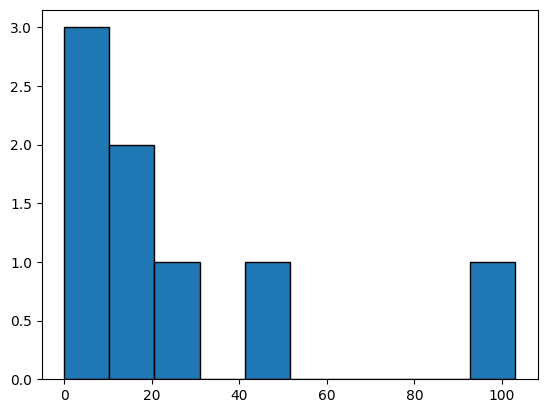

In [ ]:
plt.hist(two_months, bins=10, edgecolor='black')
plt.show()

##e

In [ ]:

np.quantile(two_months, .10)

np.float64(0.0)

##f

In [ ]:

np.median(two_months)

np.float64(14.0)

#5

In [ ]:
df_bmi=pd.read_csv('BMI.csv')

In [ ]:
df_bmi

,BMI,Exercise
0,30.470000,No
1,28.560000,Yes
2,22.310000,Yes
3,27.440000,Yes
4,25.850000,Yes
...,...,...
392783,29.210000,Yes
392784,24.960000,No
392785,34.380000,Yes
392786,23.860000,Yes


In [ ]:
no=df_bmi[df_bmi['Exercise']=='No']

In [ ]:
no

,BMI,Exercise
0,30.470000,No
6,24.410000,No
7,27.270000,No
8,33.470000,No
11,24.130000,No
...,...,...
392769,29.950000,No
392772,30.180000,No
392775,27.370000,No
392780,21.560000,No


In [ ]:
no_bmi=no.BMI.tolist()
len(no_bmi)

95257

In [ ]:
yes=df_bmi[df_bmi['Exercise']=='Yes']
yes

,BMI,Exercise
1,28.560000,Yes
2,22.310000,Yes
3,27.440000,Yes
4,25.850000,Yes
5,30.180000,Yes
...,...,...
392782,26.630000,Yes
392783,29.210000,Yes
392785,34.380000,Yes
392786,23.860000,Yes


In [ ]:
len(no_bmi)-1

95256

In [ ]:
yes_bmi=yes.BMI.tolist()
len(yes_bmi)

297531

In [ ]:
combined_bmi= no_bmi+ yes_bmi
len(combined_bmi)

392788

In [ ]:
simu_diffs=[]
for i in range(500):
  perm_sample= np.random.permutation(combined_bmi)
  perm_no= perm_sample[:len(no_bmi)]
  perm_yes=perm_sample[len(no_bmi):]
  perm_diff= np.mean(perm_no) - np.mean(perm_yes)
  simu_diffs.append(perm_diff)

In [ ]:
lower=np.quantile(simu_diffs, .025)
upper=np.quantile(simu_diffs, .975)
mean=np.mean(no_bmi)- np.mean(yes_bmi)

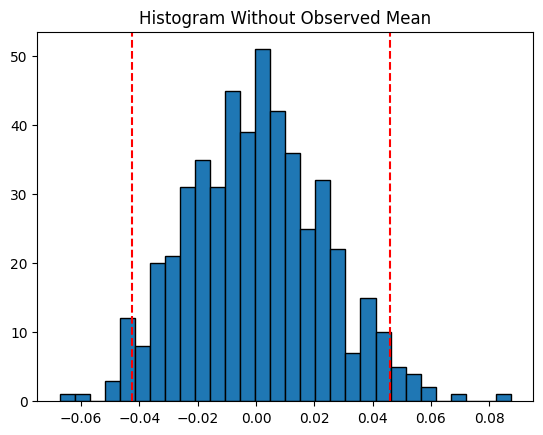

Lower:-0.04247455692613764 
Upper:0.04605129181435189


In [ ]:
plt.hist(simu_diffs, bins= 30, edgecolor='black')
plt.axvline(lower, color='red', linestyle='--')
plt.axvline(upper, color='red', linestyle='--')
#plt.axvline(mean, color='green')
plt.title('Histogram Without Observed Mean')
plt.show()
print(f'Lower:{lower} \nUpper:{upper}')

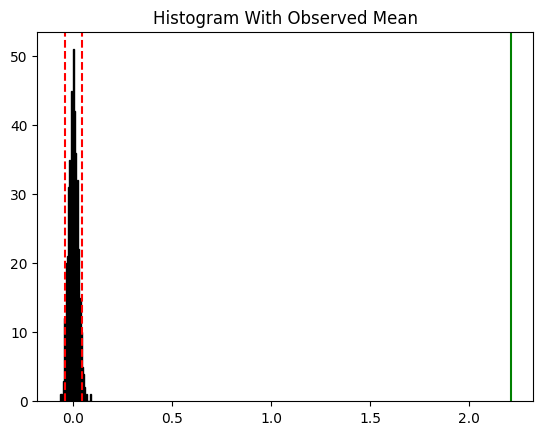

Lower:-0.04247455692613764 
Upper:0.04605129181435189 
Mean:2.208808465926829


In [ ]:
plt.hist(simu_diffs, bins= 30, edgecolor='black')
plt.axvline(lower, color='red', linestyle='--')
plt.axvline(upper, color='red', linestyle='--')
plt.axvline(mean, color='green')
plt.title('Histogram With Observed Mean')
plt.show()
print(f'Lower:{lower} \nUpper:{upper} \nMean:{mean}')

#6

In [ ]:
df_bf=pd.read_csv('BodyFat.csv')

In [ ]:
df_bf.head()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.300000,41,247.250000,73.500000,42.100000,117.000000,115.600000,26.300000,37.300000,19.700000
1,22.500000,31,177.250000,71.500000,36.200000,101.100000,92.400000,24.600000,30.100000,18.200000
2,22.000000,42,156.250000,69.000000,35.500000,97.800000,86.000000,24.000000,31.200000,17.400000
3,12.300000,23,154.250000,67.750000,36.200000,93.100000,85.200000,21.900000,32.000000,17.100000
4,20.500000,46,177.000000,70.000000,37.200000,99.700000,95.600000,22.500000,29.100000,17.700000


##a

In [ ]:

df_bf.agg(['mean','median','max','min'])

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
mean,18.601000,44.880000,177.451500,70.355000,37.894000,100.681000,91.867000,22.900000,32.292000,18.221000
median,18.950000,44.000000,176.125000,70.000000,37.900000,99.250000,90.150000,22.600000,32.000000,18.200000
max,40.100000,74.000000,262.750000,77.750000,43.200000,128.300000,126.200000,27.000000,38.500000,21.400000
min,3.700000,23.000000,127.500000,65.000000,32.800000,83.400000,70.400000,20.100000,25.600000,16.300000


##b

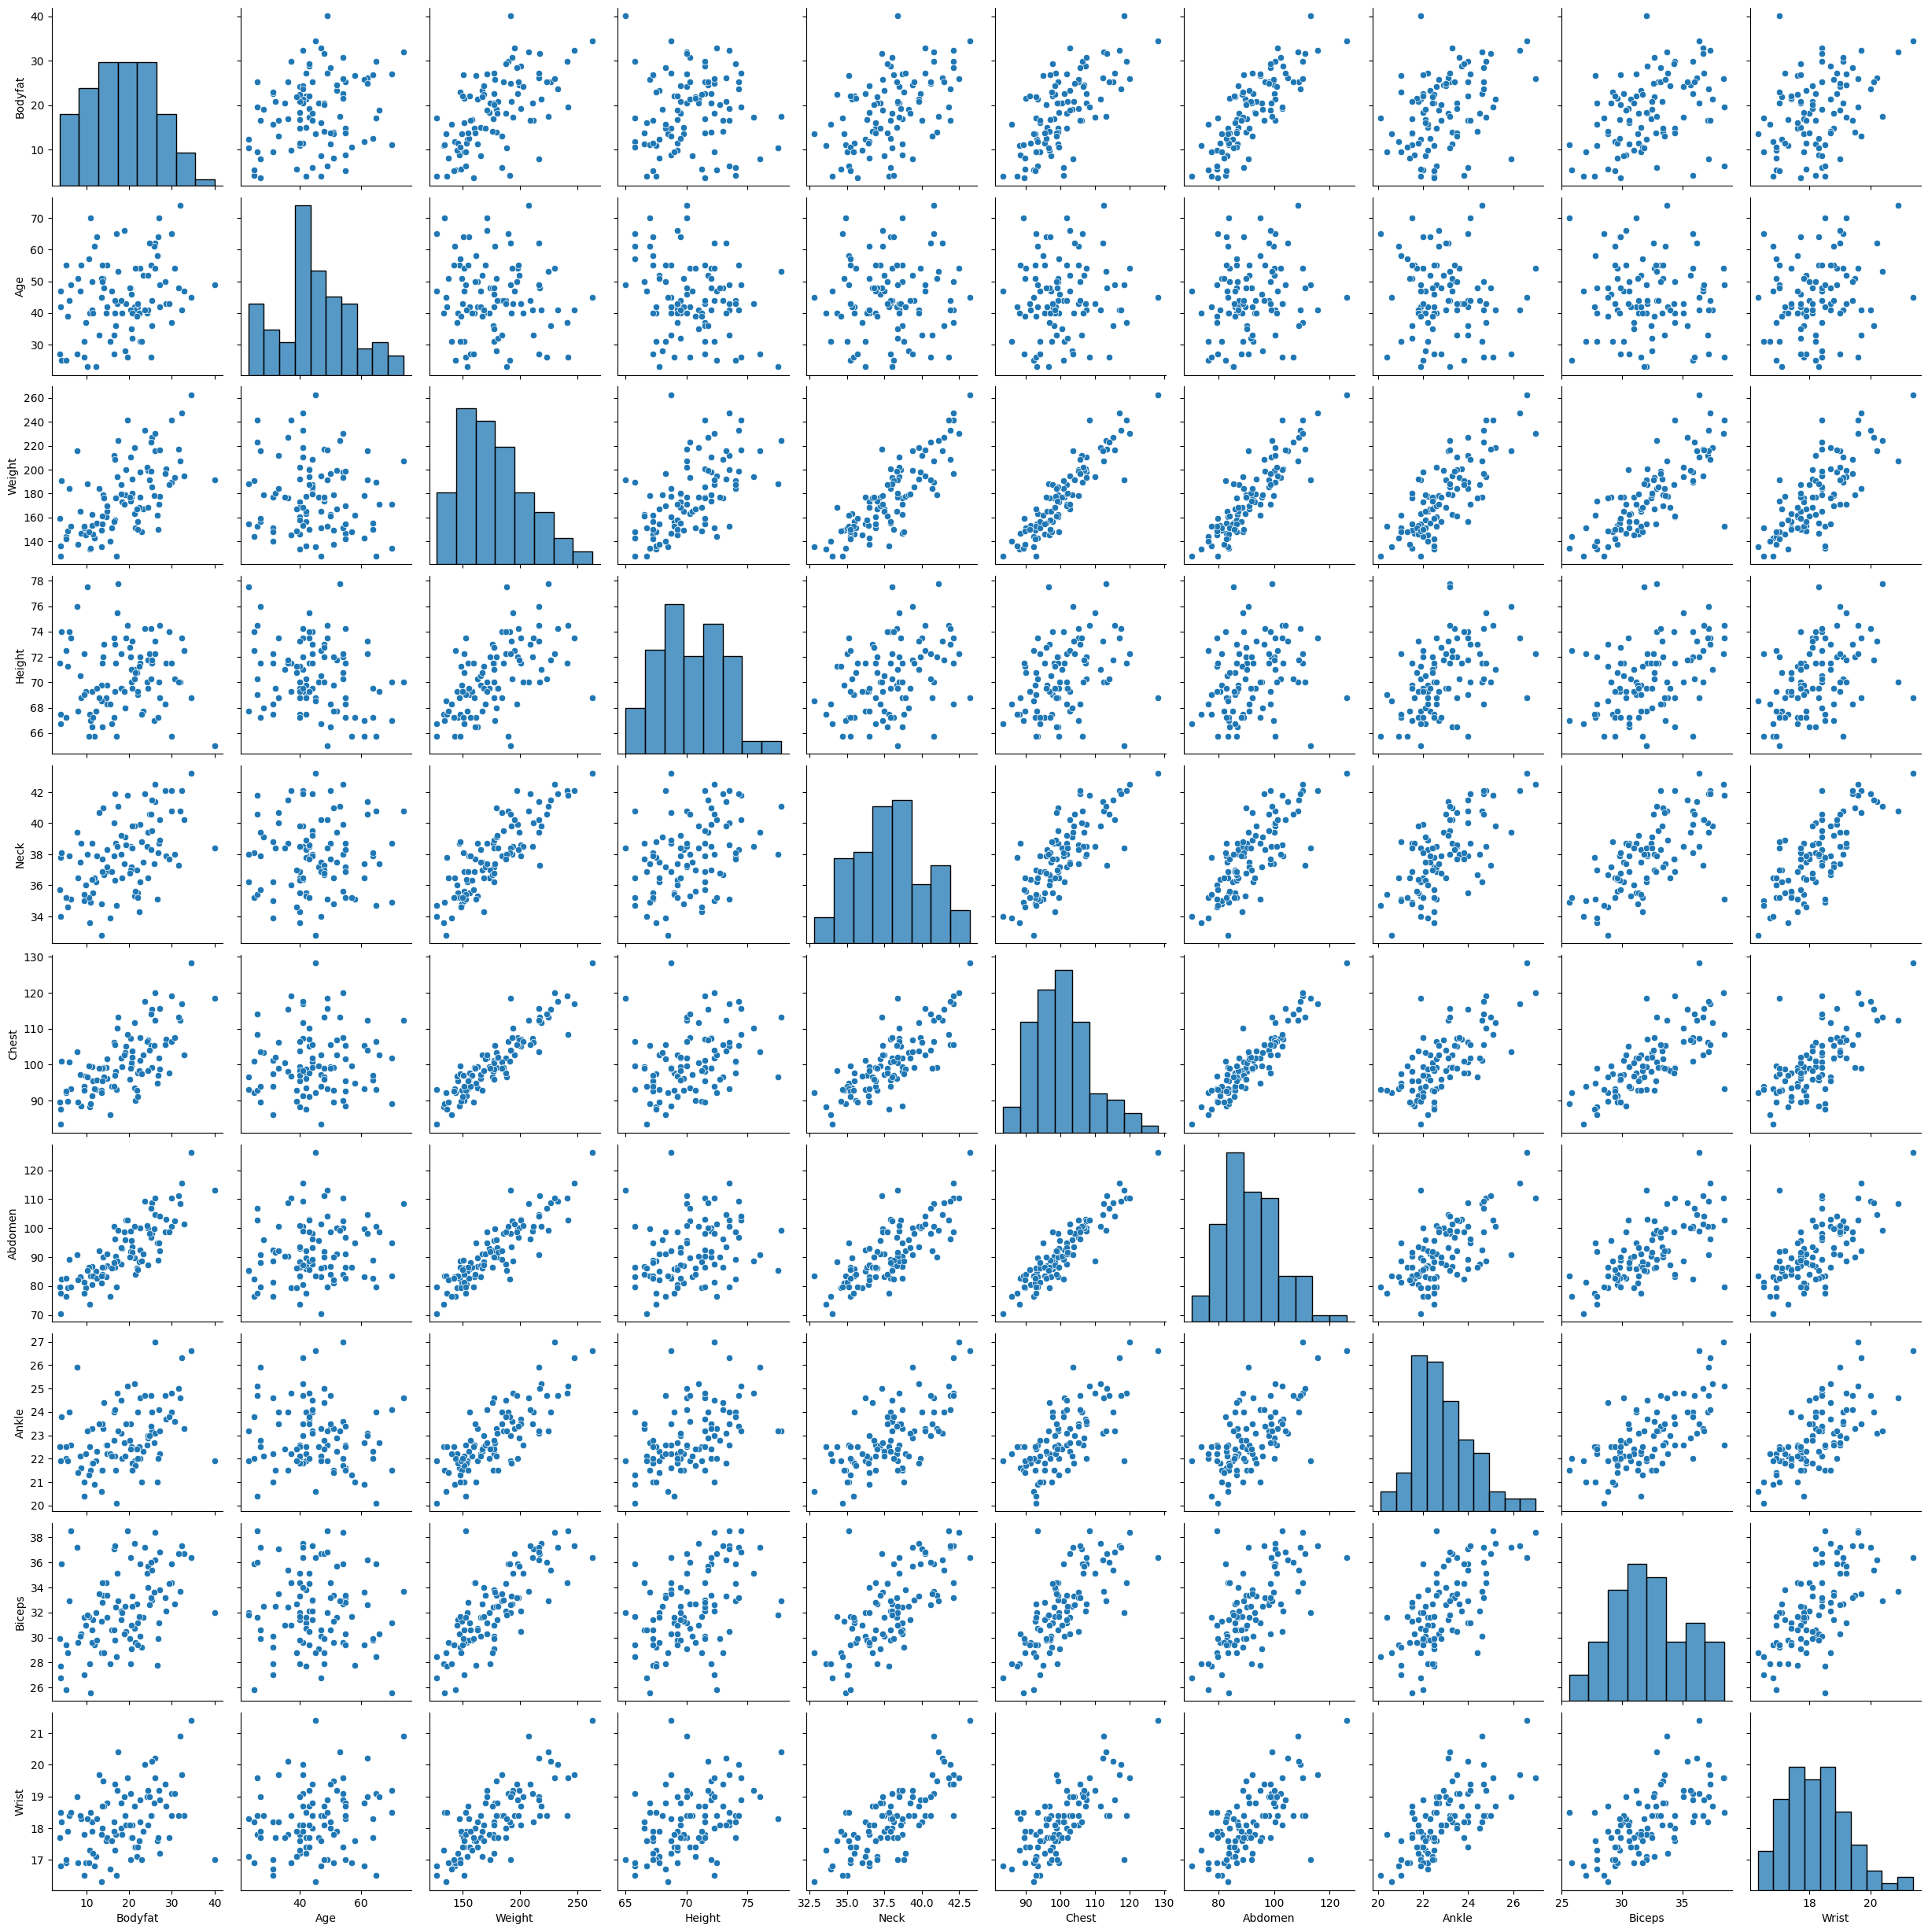

In [ ]:

sns.pairplot(df_bf)

In [ ]:
df_bf.corr()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
Bodyfat,1.000000,0.255798,0.595959,0.032210,0.504443,0.682266,0.811593,0.387911,0.418107,0.373095
Age,0.255798,1.000000,-0.097905,-0.268673,0.038501,0.072908,0.141339,-0.073522,-0.079398,0.216315
Weight,0.595959,-0.097905,1.000000,0.568433,0.838977,0.916047,0.888317,0.790388,0.786266,0.755123
Height,0.032210,-0.268673,0.568433,1.000000,0.370396,0.345312,0.265403,0.454985,0.435460,0.420928
Neck,0.504443,0.038501,0.838977,0.370396,1.000000,0.789799,0.769086,0.664068,0.701067,0.777259
Chest,0.682266,0.072908,0.916047,0.345312,0.789799,1.000000,0.922728,0.700092,0.730124,0.695795
Abdomen,0.811593,0.141339,0.888317,0.265403,0.769086,0.922728,1.000000,0.643211,0.652148,0.672061
Ankle,0.387911,-0.073522,0.790388,0.454985,0.664068,0.700092,0.643211,1.000000,0.650841,0.688320
Biceps,0.418107,-0.079398,0.786266,0.435460,0.701067,0.730124,0.652148,0.650841,1.000000,0.630473
Wrist,0.373095,0.216315,0.755123,0.420928,0.777259,0.695795,0.672061,0.688320,0.630473,1.000000


From the pairplot and the correlation matrix, I can see that there are strong correlations between (Weight & Chest), (Weight & Abdomen), (Weight & Neck), and(Chest & Abdomen).

The variable that is the most correlated with bodyfat is Abdomen with and correlation score of .811 with Chest coming in second with .68.

The least variable is Height with a correlation score of .032.

##c

**BodyFat**:  Looks like it could be normal and somewhat symetrical.  It also looks like a uniform distribution if we exclude the last two bins.

**Age**:  This graph looks to be symetrical that follows either a normal or Laplace dristrbution.

**Weight**:  This graph looks to be right skewed that follows an exponential distribution.

**Height**:  Height's histogram looks symetrical that's from a normal distribution.

**Neck**:  Neck also looks like a normal distribution that's symetrical around the mean.

**Chest**:  Check looks a bit right skewed with a low tail on the right hand side.  It looks like a triangular distribution.

**Abdomen**:  Looks symetrical around the mean with a normal distribution.

**Ankle**:  This also looks like a symetrical histogram however, it looks like it follows a Laplace distribution.

**Bicep & Wrists**:  Both of these histograms looks pretty symetrical with a normal distribution.

##d

In [ ]:

from scipy import stats as st
dists = [st.expon, st.norm, st.laplace, st.triang]
winners = {}
x=df_bf.drop(columns='Bodyfat')

for col in x.columns:
  nlls = []
  for dist in dists:
    params = dist.fit(x[col].values)
    nll = dist.nnlf(params, x[col])
    nlls.append(nll)
  lowestindex = np.argmin(nlls)
  winners[col] = dists[lowestindex].name
winners

{'Age': 'triang',
 'Weight': 'triang',
 'Height': 'triang',
 'Neck': 'triang',
 'Chest': 'triang',
 'Abdomen': 'norm',
 'Ankle': 'triang',
 'Biceps': 'triang',
 'Wrist': 'norm'}

##e

The two predictors that best follows a normal distribution are Abdomen and Wrist.

##f

In [ ]:

df_x=df_bf[['Abdomen','Wrist']]

In [ ]:
y=df_bf.Bodyfat

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(df_x,y)
print(model.intercept_)
print(model.coef_)

-8.832385931845213
[ 0.79809588 -2.518264  ]


**Linear Regression Model:**

y= (.789 * Abdomen) + (-2.518 * Wrist) - 8.832

##g

In [ ]:

mean_x= df_x.mean()
mean_x

,0
Abdomen,91.867000
Wrist,18.221000


In [ ]:
cov_x=df_x.cov()
cov_x

,Abdomen,Wrist
Abdomen,105.292940,6.891508
Wrist,6.891508,0.998645


##h

In [ ]:

x_sim=st.multivariate_normal.rvs( mean=mean_x, size=5000, cov=cov_x)

In [ ]:
x_sim

array([[96.62644569, 17.80579144],
       [84.46827857, 19.08623398],
       [95.14600858, 17.27636051],
       ...,
       [99.45336425, 19.09666954],
       [86.52703816, 17.94617085],
       [77.80264687, 17.57161823]])

##i

In [ ]:

df_sim=pd.DataFrame(x_sim, columns=df_x.columns)
df_sim

,Abdomen,Wrist
0,96.626446,17.805791
1,84.468279,19.086234
2,95.146009,17.276361
3,94.169350,18.777786
4,101.055516,18.649093
...,...,...
4995,79.459218,18.246029
4996,91.218867,19.188947
4997,99.453364,19.096670
4998,86.527038,17.946171


In [ ]:
y_pred=model.predict(df_sim)

In [ ]:
df_sim['y_pred']=y_pred
df_sim.head()

,Abdomen,Wrist,y_pred
0,96.626446,17.805791,23.445099
1,84.468279,19.086234,10.517223
2,95.146009,17.276361,23.596815
3,94.169350,18.777786,19.036363
4,101.055516,18.649093,24.856266


In [ ]:
upper25_ab=np.quantile(df_sim.Abdomen,.75)
upper25_ab

np.float64(99.29627283189629)

In [ ]:
upper25_wr=np.quantile(df_sim.Wrist,.75)
upper25_wr

np.float64(18.897016983768275)

In [ ]:
upper25=df_sim[(df_sim.Abdomen > upper25_ab) & (df_sim.Wrist > upper25_wr)]

In [ ]:
upper25.head()

,Abdomen,Wrist,y_pred
6,99.560716,19.539617,21.420699
15,117.739173,19.920327,34.970119
26,108.076871,19.563229,28.157943
27,110.184058,19.316295,30.461525
37,106.351629,19.208667,27.673916


In [ ]:
upper25_outcome= np.mean(upper25['y_pred'])

In [ ]:
upper25_outcome

np.float64(26.689147408664816)

##j

In [ ]:
lower33_ab=np.quantile(df_sim.Abdomen,.33)
upper33_ab=np.quantile(df_sim.Abdomen, .67)
lower33_wr=np.quantile(df_sim.Wrist,.33)
upper33_wr=np.quantile(df_sim.Wrist,.67)

In [ ]:
bottom_or_top_33=df_sim[(df_sim.Abdomen<lower33_ab) & (df_sim.Wrist>upper33_wr) | (df_sim.Abdomen>upper33_ab) & (df_sim.Wrist<lower33_wr)]

In [ ]:
print(bottom_or_top_33)
print(lower33_ab, upper33_ab, lower33_wr, upper33_wr)

        Abdomen     Wrist    y_pred
1     84.468279 19.086234 10.517223
79    80.899808 18.737504  8.547435
85    84.890528 18.909221 11.299983
92   109.813646 17.458476 34.844380
94    79.150910 18.878675  6.796140
...         ...       ...       ...
4874  85.122959 18.882649 11.552401
4890 103.203786 17.029154 30.650225
4918  82.405211 19.110509  8.809567
4936  82.135249 18.664298  9.717787
4978  85.729212 19.193803 11.252681

[233 rows x 3 columns]
87.58627922958023 96.86044318946885 17.77316587782751 18.66305090004366


In [ ]:
bot_or_top_33_outcome=np.mean(bottom_or_top_33['y_pred'])

In [ ]:
bot_or_top_33_outcome

np.float64(18.577619967723802)